# Hierarchical Clustering
Example code for heirarchical clustering


In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram, cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, \
                                    homogeneity_completeness_v_measure, contingency_matrix


In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=60, centers=5,
                              cluster_std=(0.3,0.4,0.5,0.7,0.7),
                              center_box=(0, 8), random_state=1234)

y_true = pd.Categorical([["A","B","C","D","E"][x] for x in y_true])
df = pd.DataFrame(data={"x" : X[:,0],
                        "y" : X[:,1],
                        "target": y_true })
X = df.iloc[:,0:2]
y_true = df.iloc[:,2]


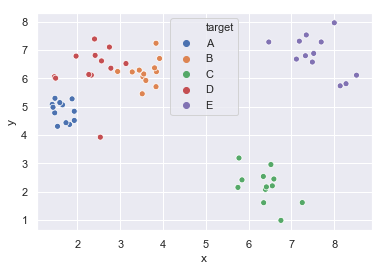

In [6]:
sns.scatterplot(x="x",y="y",hue="target",data=df )
plt.show()


Let's make our first hierarchical clustering. We'll do it piecewise, using some functions in 
the `scipy.cluster.hierarchy` package.

We start by computing a distance matrix over all of our data:

In [8]:
d = pdist(X,metric="euclidean")


Now, let's perform the hierarchical clustering using `single` linkage:


In [9]:
lnk = linkage(d,method="single")


Finally, let's plot a basic dendrogram using the `dendrogram` function. Notice some of the 
options we'll use to get some more informative results:

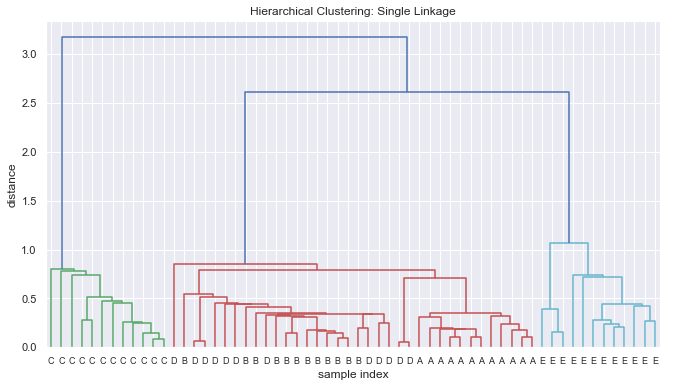

In [10]:
# Plot the dendrogram, but label the leafs using the actual labels in the data
plt.figure(figsize=(11,6))
plt.title("Hierarchical Clustering: Single Linkage")
plt.xlabel("sample index")
plt.ylabel("distance")
dnd = dendrogram(lnk,labels=list(y_true),leaf_rotation=0,leaf_font_size=9,
                 color_threshold=2)
plt.show()
